In [131]:
#Importações
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns

# Carregamento do dataset do módulo datasets do sklearn
X = datasets.load_wine()
y = X.target

In [132]:
print(X['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

(array([59.,  0.,  0.,  0.,  0., 71.,  0.,  0.,  0., 48.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

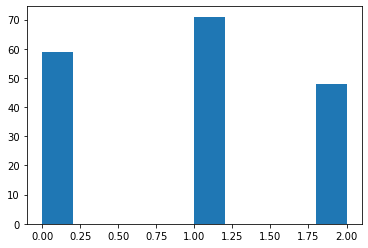

In [133]:
# Conversão para dataframe para processamento
dataset = pd.DataFrame(X.data, columns = X.feature_names)

#Verificando número de amostras em cada classe
plt.hist(y)

In [134]:
#Descrição do dataset
dataset.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


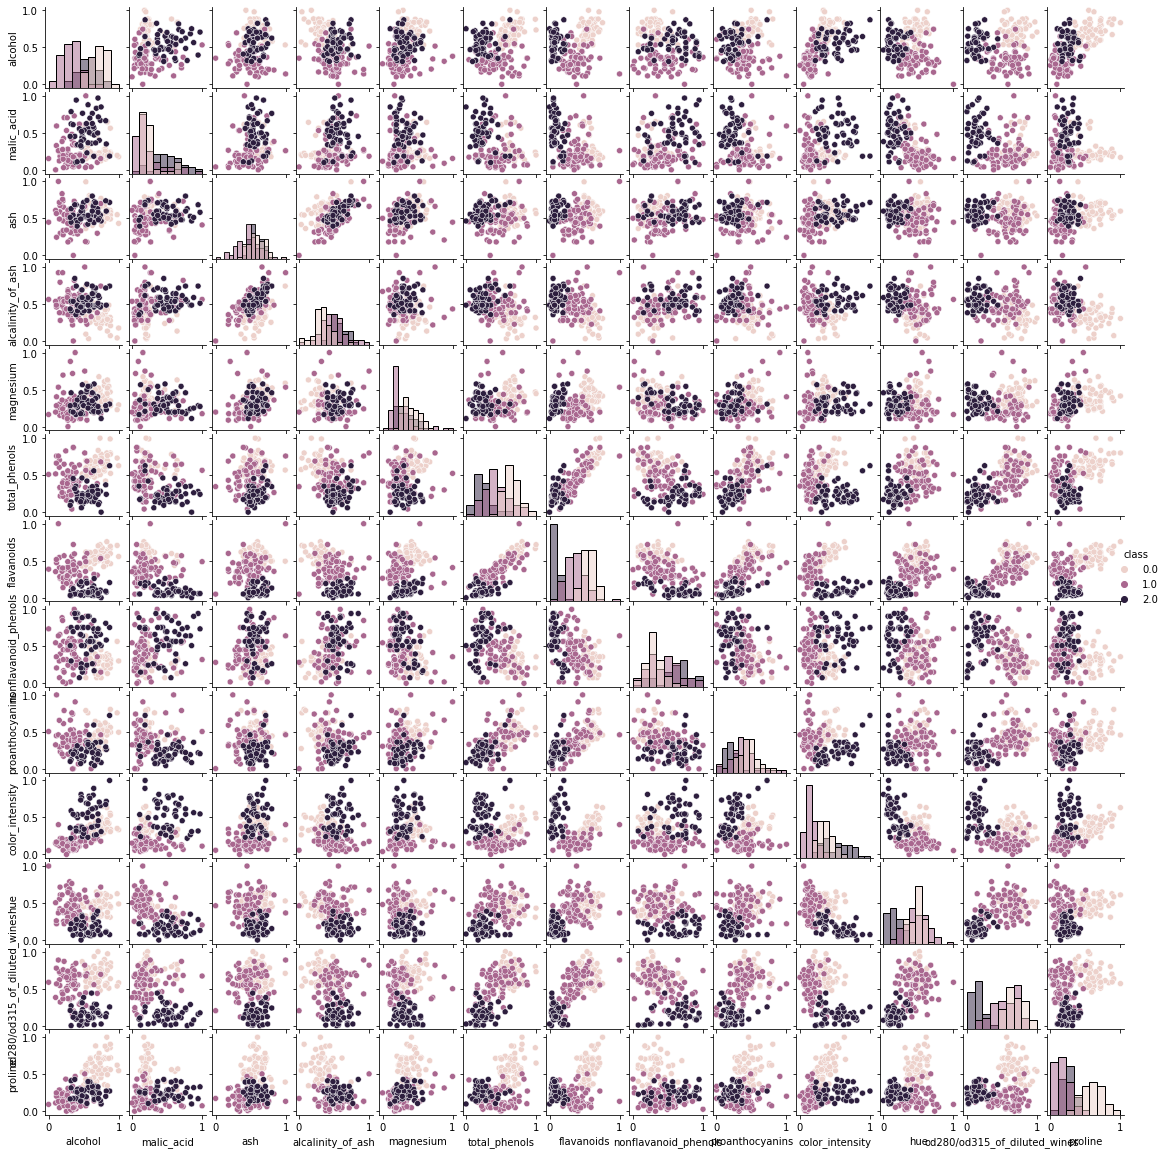

In [135]:
#Importação do MinMaxScaler para normalização do dataset, tendo em vista as discrepâncias entres as variaveis
from sklearn.preprocessing import MinMaxScaler
#Importação da NumPy
import numpy as np

#Normalizando dataset
scaler = MinMaxScaler()
scaler.fit(dataset)
           
#Atribuindo o dataset completo a uma variável para utilizar posteriormente    
dataset_norm=scaler.transform(dataset)

#Visualização dos atributos e do target
dataset_norm = pd.DataFrame(dataset_norm, columns = dataset.columns)
dataset_norm_ = pd.DataFrame(np.hstack((dataset_norm, y[:, np.newaxis])), columns = dataset.columns.tolist() + ['class'])

#Plotando grafico para visualização de correlações
g = sns.pairplot(dataset_norm_, hue = 'class', diag_kind='hist')
g.fig.set_figheight(16)
g.fig.set_figwidth(16)
g

<AxesSubplot:>

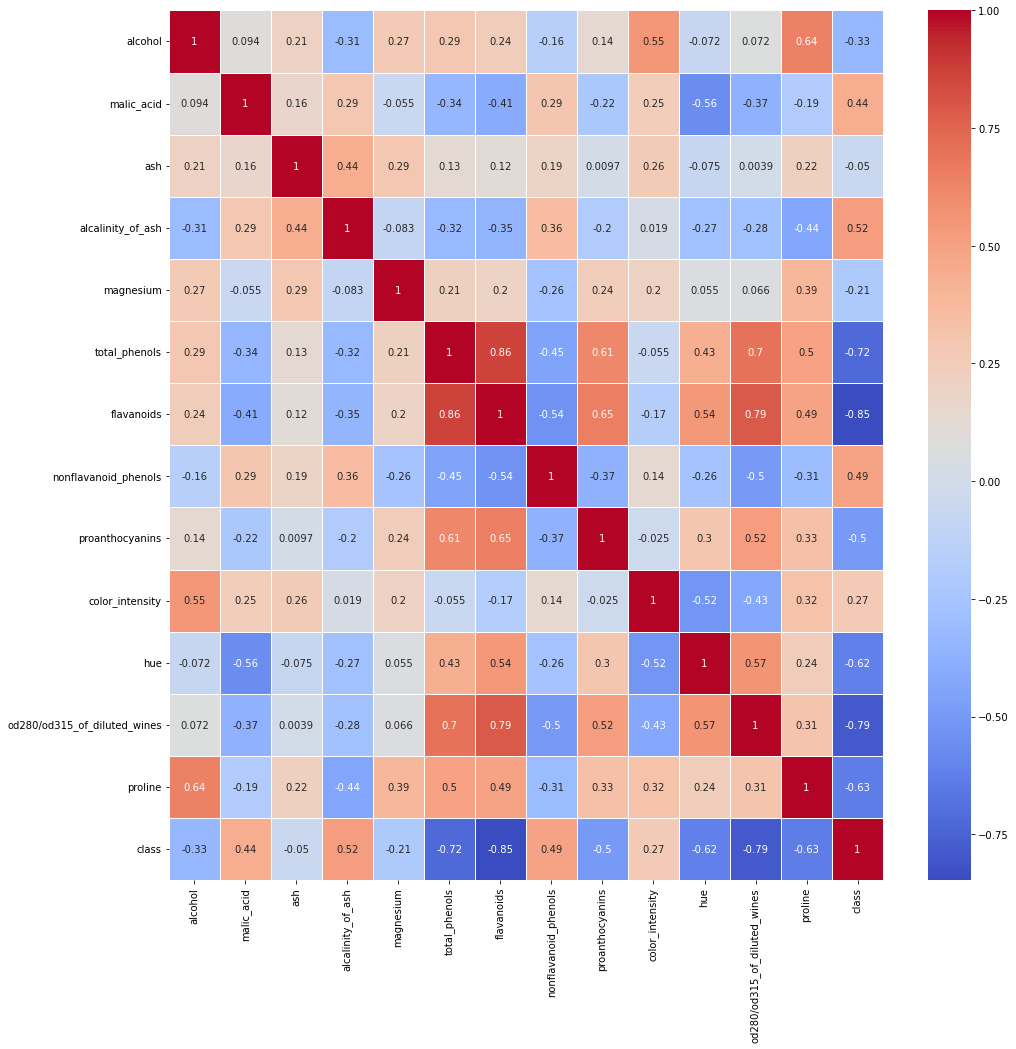

In [136]:
#Verificando manualmente a correlação entre os atributos e as classes
plt.figure(figsize = (16,16))
sns.heatmap(dataset_norm_.corr(), annot = True, linewidths=.5, cmap='coolwarm')

In [137]:
#função para obter as features selecionadas e as features não selecionadas pelo método de seleção de atributos
def getFeaturesNames(feature_selector):
    features_norm = X.feature_names
    mask = feature_selector.get_support(indices=True)
    features_trim = [features_norm[i] for i in mask]
    featutres_trim_excluded = [element for i, element in enumerate(features_norm) if i not in mask]
    return features_trim,  featutres_trim_excluded

In [138]:
#importações dos métodos e dos classificadores
from sklearn.feature_selection import SelectKBest, f_classif,chi2, SelectPercentile, SequentialFeatureSelector,RFE, RFECV, SelectFromModel
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR, SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

#n~umero de features desejadas
n_features = 7


In [139]:
#MÉTODOS FILTRO

##SelectKBest - Obtendo as n features com os maiores score definidos pela função f_classif(ANOVA)
bestfeatures_SelectKBest = SelectKBest(score_func=f_classif,k=n_features)
dataset_trim_SelectKBest = bestfeatures_SelectKBest.fit_transform(dataset_norm, y)
features_trim_SelectKBest,features_trim_excluded_SelectKBest = getFeaturesNames(bestfeatures_SelectKBest)

##SelectPercentile - Obtendo porcentagem de features com os maiores score definidos pela função f_classif(ANOVA)
bestfeatures_SelectPercentile =  SelectPercentile(score_func=f_classif, percentile=50)
dataset_trim_SelectPercentile = bestfeatures_SelectPercentile.fit_transform(dataset_norm, y)
features_trim_SelectPercentile,features_trim_excluded_SelectPercentile = getFeaturesNames(bestfeatures_SelectPercentile)

In [140]:
#MÉTODOS WRAPPER

##SequentialFeatureSelector
knn = KNeighborsClassifier() #estimador
bestfeatures_SFS = SequentialFeatureSelector(knn, n_features_to_select=n_features)
dataset_trim_SFS = bestfeatures_SFS.fit_transform(dataset_norm, y)
features_trim_SFS,features_trim_excluded_SFS = getFeaturesNames(bestfeatures_SFS)

##Recursive Feature Elimination
svr = SVR(kernel="linear") #estimador
bestfeatures_RFE = RFE(svr, n_features_to_select=n_features, step=1)
dataset_trim_RFE = bestfeatures_RFE.fit_transform(dataset_norm, y)
features_trim_RFE,features_trim_excluded_RFE = getFeaturesNames(bestfeatures_RFE)

##Recursive Feature Elimination with cross validation
svc = SVC(kernel="linear") #estimador
min_features_to_select = 1  #mínimo de atributos para selecionar
bestfeatures_RFECV = RFECV(
    estimator=svc,
    step=1,
    cv=StratifiedKFold(n_features), #Cross-Validation,
    scoring="accuracy"
)
dataset_trim_RFECV = bestfeatures_RFECV.fit_transform(dataset_norm, y)
features_trim_RFECV,features_trim_excluded_RFECV = getFeaturesNames(bestfeatures_RFECV)

In [141]:
#MÉTODO EMBEDDED

##Select From Model
bestfeatures_SelectFromModel = SelectFromModel(estimator=LogisticRegression())
dataset_trim_SelectFromModel = bestfeatures_SelectFromModel.fit_transform(dataset_norm, y)
features_trim_SelectFromModel,features_trim_excluded_SelectFromModel = getFeaturesNames(bestfeatures_SelectFromModel)

In [142]:

print(X.data.shape)
print(dataset_trim_SelectKBest.shape)
print(dataset_trim_SelectPercentile.shape)
print(dataset_trim_SFS.shape)
print(dataset_trim_RFE.shape)
print(dataset_trim_RFECV.shape)
print(dataset_trim_SelectFromModel.shape)


print(features_trim_SelectKBest)
print(features_trim_SelectPercentile)
print(features_trim_SFS)
print(features_trim_RFE)
print(features_trim_RFECV)
print(features_trim_SelectFromModel)

(178, 13)
(178, 7)
(178, 6)
(178, 7)
(178, 7)
(178, 9)
(178, 6)
['alcohol', 'total_phenols', 'flavanoids', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['alcohol', 'flavanoids', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['alcohol', 'ash', 'magnesium', 'flavanoids', 'color_intensity', 'hue', 'proline']
['alcohol', 'alcalinity_of_ash', 'flavanoids', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'flavanoids', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['alcohol', 'flavanoids', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


1.0


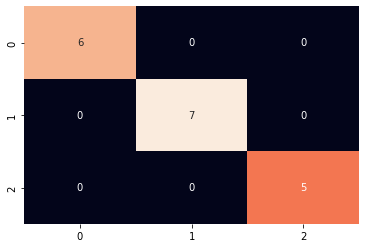

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


def train_and_validate(X_train, X_test, y_train, y_test):
    mode = GaussianNB()    
    mode.fit(X_train, y_train);
    y_calc = mode.predict(X_test)
    y_prob = mode.predict_proba(X_test)
    print(accuracy_score(y_test, y_calc))
    #print(y_prob)
    mat = confusion_matrix(y_test, y_calc)
    sns.heatmap(mat.T, annot=True, cbar = False)

    
    
X_train_norm, X_test_norm, y_train, y_test = train_test_split(dataset_norm, y, test_size = 0.10, stratify = None, random_state=0)
X_train_SelectKBest, X_test_SelectKBest = X_train_norm.drop(features_trim_excluded_SelectKBest, axis=1), X_test_norm.drop(features_trim_excluded_SelectKBest, axis=1)
X_train_SelectPercentile, X_test_SelectPercentile = X_train_norm.drop(features_trim_excluded_SelectPercentile, axis=1), X_test_norm.drop(features_trim_excluded_SelectPercentile, axis=1)
X_train_SFS, X_test_SFS = X_train_norm.drop(features_trim_excluded_SFS, axis=1), X_test_norm.drop(features_trim_excluded_SFS, axis=1)
X_train_RFE,X_test_RFE =  X_train_norm.drop(features_trim_excluded_RFE, axis=1), X_test_norm.drop(features_trim_excluded_RFE, axis=1)
X_train_RFECV,X_test_RFECV =  X_train_norm.drop(features_trim_excluded_RFECV, axis=1), X_test_norm.drop(features_trim_excluded_RFECV, axis=1)

X_train_SFM,X_test_SFM =  X_train_norm.drop(features_trim_excluded_SelectFromModel, axis=1), X_test_norm.drop(features_trim_excluded_SelectFromModel, axis=1)



train_and_validate(X_train_norm,  X_test_norm, y_train, y_test )

1.0


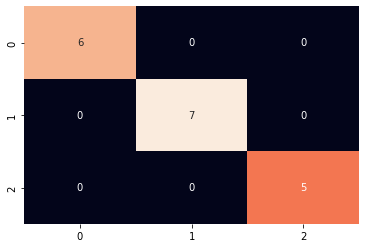

In [144]:
train_and_validate(X_train_SelectKBest, X_test_SelectKBest, y_train, y_test )


1.0


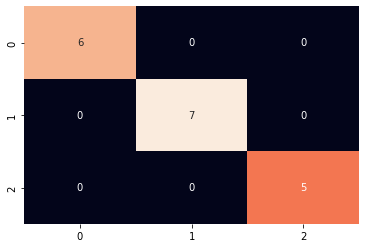

In [145]:
train_and_validate(X_train_SelectPercentile, X_test_SelectPercentile, y_train, y_test )

1.0


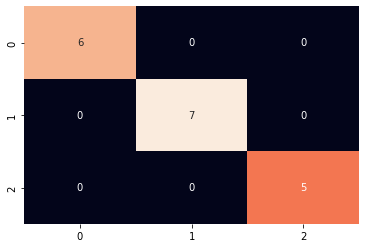

In [146]:
train_and_validate(X_train_SFS, X_test_SFS, y_train, y_test )

1.0


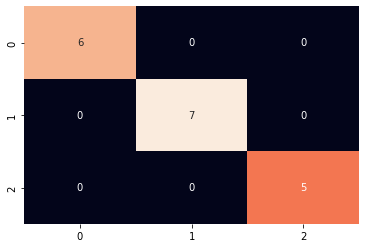

In [147]:
train_and_validate(X_train_RFE,X_test_RFE, y_train, y_test )


1.0


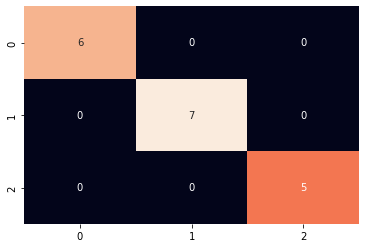

In [148]:
train_and_validate(X_train_RFECV,X_test_RFECV, y_train, y_test )

1.0


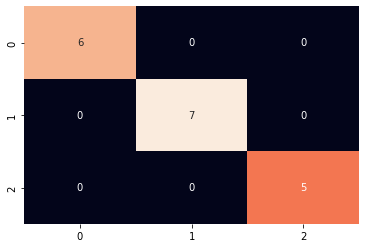

In [149]:
train_and_validate(X_train_SFM, X_test_SFM, y_train, y_test ) 

Preprocessing data...
Creating summary of the background dataset...
Computing explanations...


  0%|          | 0/35 [00:00<?, ?it/s]

30.396806001663208


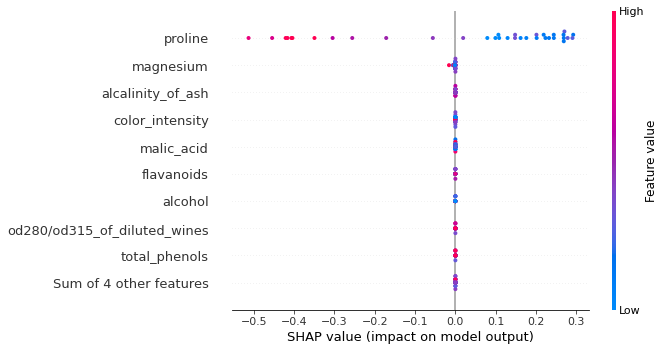

In [150]:
import random
import numpy as np

import dr_explainer as dre
import time
data = X.data

clusterShapley = dre.ClusterShapley()
inicio = time.time()
clusterShapley.fit(data, y)

to_explain = np.array(random.sample(data.tolist(), int(data.shape[0] * 0.2)))
shap_values = clusterShapley.transform(to_explain)
fim = time.time()





print(fim - inicio)

import shap


klass = 0
c_exp = shap.Explanation(shap_values[klass], data=to_explain, feature_names=X.feature_names)
shap.plots.beeswarm(c_exp)

Preprocessing data...
Creating summary of the background dataset...
Computing explanations...


  0%|          | 0/35 [00:00<?, ?it/s]

2.2068636417388916


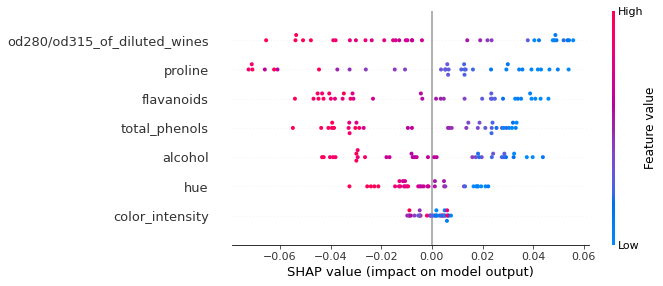

In [151]:
clusterShapley2 = dre.ClusterShapley()
inicio = time.time()
clusterShapley2.fit(dataset_trim_SelectKBest, y)
to_explain2 = np.array(random.sample(dataset_trim_SelectKBest.tolist(), int(dataset_trim_SelectKBest.shape[0] * 0.2)))
shap_values2 = clusterShapley2.transform(to_explain2)
fim = time.time()





print(fim - inicio)


klass2 = 0
c_exp2 = shap.Explanation(shap_values2[klass2], data=to_explain2, feature_names=features_trim_SelectKBest)
shap.plots.beeswarm(c_exp2)

In [152]:
clusterShapley3 = dre.ClusterShapley()

inicio = time.time()
clusterShapley3.fit(dataset_trim_SelectPercentile, y)
to_explain3 = np.array(random.sample(dataset_trim_SelectPercentile.tolist(), int(dataset_trim_SelectPercentile.shape[0] * 0.2)))
shap_values3 = clusterShapley3.transform(to_explain3)

fim = time.time()





print(fim - inicio)

Preprocessing data...
Creating summary of the background dataset...
Computing explanations...


  0%|          | 0/35 [00:00<?, ?it/s]

1.4749205112457275


In [153]:

clusterShapley4 = dre.ClusterShapley()
inicio = time.time()
clusterShapley4.fit(dataset_trim_SFS, y)
to_explain4 = np.array(random.sample(dataset_trim_SFS.tolist(), int(dataset_trim_SFS.shape[0] * 0.2)))
shap_values4 = clusterShapley4.transform(to_explain4)
fim = time.time()





print(fim - inicio)


Preprocessing data...
Creating summary of the background dataset...
Computing explanations...


  0%|          | 0/35 [00:00<?, ?it/s]

2.3744635581970215


In [154]:

clusterShapley5 = dre.ClusterShapley()
inicio = time.time()
clusterShapley5.fit(dataset_trim_RFE, y)
to_explain5 = np.array(random.sample(dataset_trim_RFE.tolist(), int(dataset_trim_RFE.shape[0] * 0.2)))
shap_values5 = clusterShapley5.transform(to_explain5)
fim = time.time()





print(fim - inicio)

Preprocessing data...
Creating summary of the background dataset...
Computing explanations...


  0%|          | 0/35 [00:00<?, ?it/s]

2.3079540729522705


In [155]:


clusterShapley6 = dre.ClusterShapley()
inicio = time.time()
clusterShapley6.fit(dataset_trim_RFECV, y)
to_explain6 = np.array(random.sample(dataset_trim_RFECV.tolist(), int(dataset_trim_RFECV.shape[0] * 0.2)))
shap_values6 = clusterShapley6.transform(to_explain6)
fim = time.time()





print(fim - inicio)



Preprocessing data...
Creating summary of the background dataset...
Computing explanations...


  0%|          | 0/35 [00:00<?, ?it/s]

7.092663526535034


In [157]:

clusterShapley7 = dre.ClusterShapley()
inicio = time.time()
clusterShapley7.fit(dataset_trim_SelectFromModel, y)
to_explain7 = np.array(random.sample(dataset_trim_SelectFromModel.tolist(), int(dataset_trim_SelectFromModel.shape[0] * 0.2)))
shap_values7 = clusterShapley7.transform(to_explain7)
fim = time.time()





print(fim - inicio)

Preprocessing data...
Creating summary of the background dataset...
Computing explanations...


  0%|          | 0/35 [00:00<?, ?it/s]

1.3604991436004639
